The goal is to find the characteristics that contribute to the price of an apartment and create an alarm which sends 
an automated email if an apartment comes up with a lower price than it should be.

In [38]:
# Imports collected here
import sys, os
from time import sleep, time
from random import random
from IPython.display import Image
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import scrapy
from scrapy import Selector
import numpy as np
import pandas as pd

# Set screenshot path
ROOT_DIR = os.path.dirname(os.path.abspath('JoDa.ipynb'))
path = os.path.join(os.path.sep, ROOT_DIR,'Screenshots'+ os.sep)

In [29]:
# Initialize browser session and settings
WINDOW_SIZE = "1920, 1080"

chromeOptions = webdriver.ChromeOptions()
chromeOptions.add_argument('--headless')
chromeOptions.add_argument('--no-sandbox')
chromeOptions.add_argument('--disable-dev-shm-usage')
chromeOptions.add_argument(f"--window-size={WINDOW_SIZE}")

browser = webdriver.Chrome(options=chromeOptions)

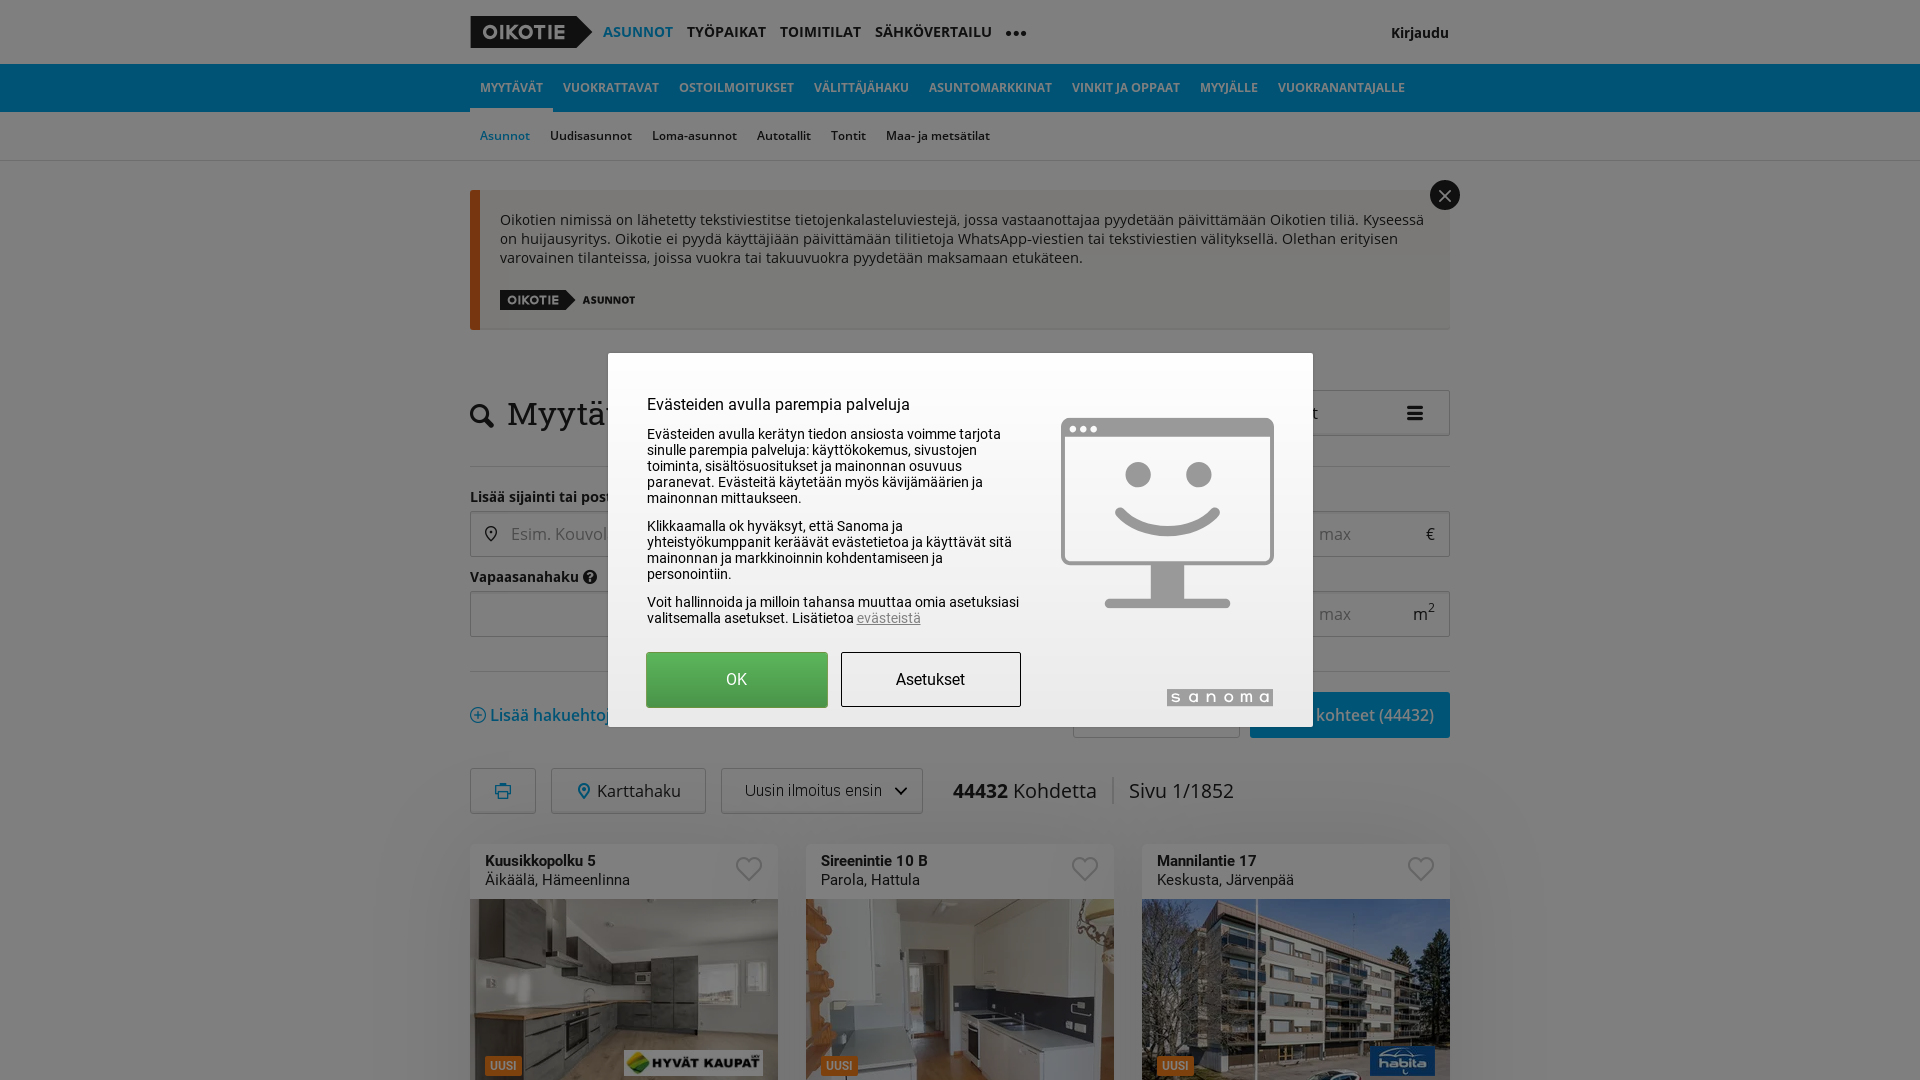

In [30]:
browser.get('https://asunnot.oikotie.fi/myytavat-asunnot')
sleep(2)

browser.save_screenshot(path + 'test1.png')
Image(filename=path + 'test1.png') 

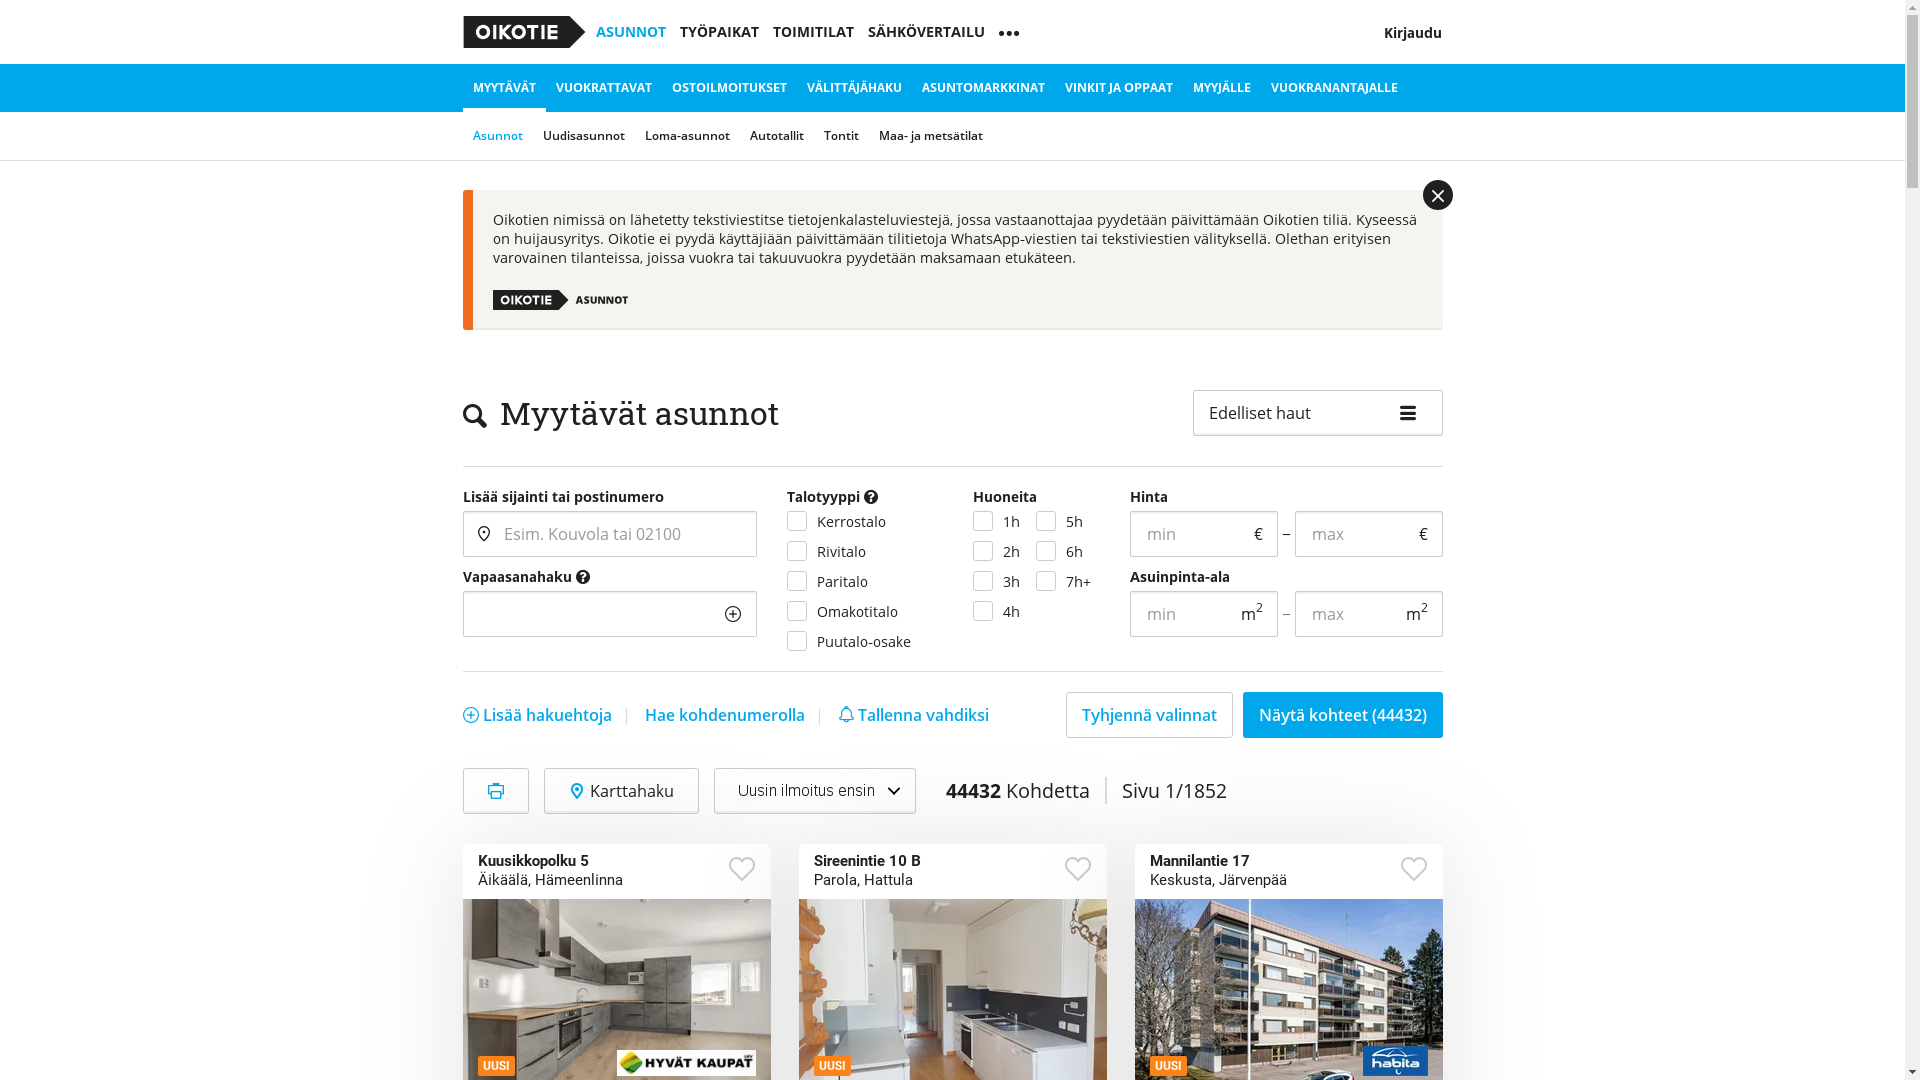

In [31]:
# Click that cookies are OK
cookiesOk = browser.find_element_by_xpath('//*[@id="sccm-opt-out-c1"]')
cookiesOk.click()

sleep(2+random())

browser.save_screenshot(path + 'test2.png')
Image(filename=path + 'test2.png') 

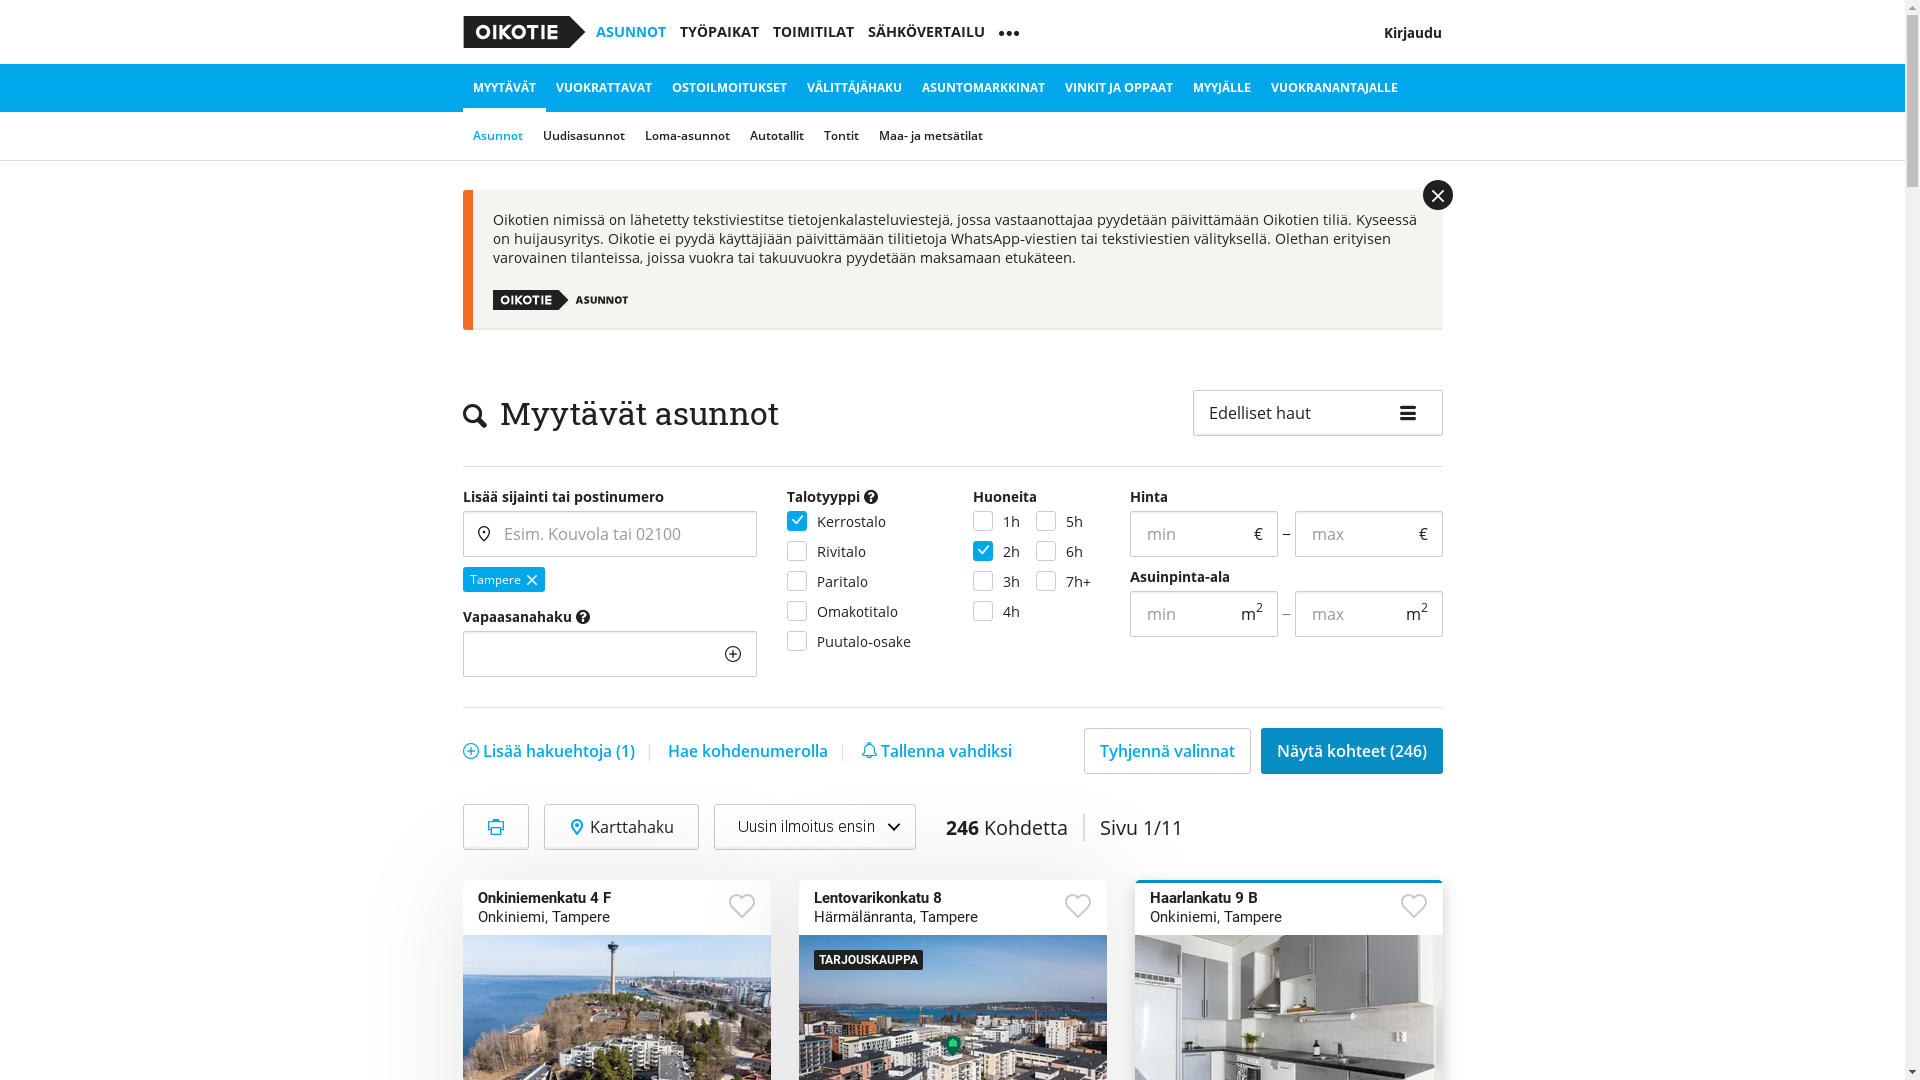

In [32]:
# Assign search parameters
LOCATION = "Tampere"
TWO_ROOMS = True
APARTMENT_BUILDINGS = True
SAUNA = True

# Set location
locationInput = browser.find_element_by_xpath('//*[@id="autocomplete2-input"]')
locationInput.send_keys(LOCATION)
sleep(random())
locationInput.send_keys(Keys.RETURN)
sleep(1+random())

if TWO_ROOMS:
    twoRooms = browser.find_element_by_xpath("//label[text()='2h']")
    twoRooms.click()
    sleep(random())
    
if APARTMENT_BUILDINGS:
    apBuilding = browser.find_element_by_xpath("//label[text()='Kerrostalo']")
    apBuilding.click()
    sleep(random())
    
if SAUNA:                                      
    moreOptions = browser.find_element_by_xpath("//span[text()='Lisää hakuehtoja']")
    moreOptions.click()
    sleep(1+random())

    sauna = browser.find_element_by_xpath("//label[text()='Sauna']")
    sauna.click()
    sleep(random())
    
# Show search results
showResults = browser.find_element_by_xpath("//button[contains(text(), 'Näytä kohteet')]")
showResults.click()

sleep(2+random())

browser.save_screenshot(path + 'test3.png')
Image(filename=path + 'test3.png') 

In [33]:

all_links = []
i = 0
start = time()
while True:
    scrapy_selector = Selector(text = browser.page_source)
    apartments_selector = scrapy_selector.xpath("//a[contains(@href, 'https://asunnot.oikotie.fi/myytavat-asunnot/tampere/')]")
    all_links += apartments_selector.xpath('@href').getall()
    
    next_button = browser.find_element_by_xpath("//button/span[contains(text(), 'Seuraava')]/..")
    
    try:
        disabled = scrapy_selector.xpath("//button/span[contains(text(), 'Seuraava')]/..").attrib['disabled']
    
    except:
        disabled = False
      
    
    if disabled:
        print("reached end")
        break
        
    i += 1
    print("Page " + str(i))
    if i > 20:
        print("reached end by indexing")
        break
    
    next_button.click()
    sleep(3+random())
    

print('Theres a total of ' + str(len(all_links)) + ' links.')

print(all_links)


False
Page 1
False
Page 2
False
Page 3
False
Page 4
False
Page 5
False
Page 6
False
Page 7
False
Page 8
False
Page 9
False
Page 10
disabled
reached end
Theres a total of 246 links.
['https://asunnot.oikotie.fi/myytavat-asunnot/tampere/15611406', 'https://asunnot.oikotie.fi/myytavat-asunnot/tampere/15611116', 'https://asunnot.oikotie.fi/myytavat-asunnot/tampere/15610810', 'https://asunnot.oikotie.fi/myytavat-asunnot/tampere/15610753', 'https://asunnot.oikotie.fi/myytavat-asunnot/tampere/15610679', 'https://asunnot.oikotie.fi/myytavat-asunnot/tampere/15609798', 'https://asunnot.oikotie.fi/myytavat-asunnot/tampere/15609430', 'https://asunnot.oikotie.fi/myytavat-asunnot/tampere/15608660', 'https://asunnot.oikotie.fi/myytavat-asunnot/tampere/15608521', 'https://asunnot.oikotie.fi/myytavat-asunnot/tampere/15608473', 'https://asunnot.oikotie.fi/myytavat-asunnot/tampere/15607864', 'https://asunnot.oikotie.fi/myytavat-asunnot/tampere/15607755', 'https://asunnot.oikotie.fi/myytavat-asunnot/tampe

In [36]:

data_array = np.zeros([len(all_links), 9], dtype=object)
i = 0

for url in all_links:
    browser.get(url)
    sleep(0.5+random())

    ApSelector = Selector(text = browser.page_source)

    location = ApSelector.xpath("//h1[contains(@class, 'listing-header__headline--secondary')]/span[contains(@class, 'listing-header__text')]/text()").get()
    print(location)

    price_sales = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Myyntihinta')]/following-sibling::dd/text()").get()
    print(price_sales)

    price_no_debt = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Velaton hinta')]/following-sibling::dd/text()").get()
    print(price_no_debt)

    area = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Asuinpinta-ala')]/following-sibling::dd/text()").get()
    print(area)

    price_per_sq = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Neliöhinta')]/following-sibling::dd/text()").get()
    print(price_per_sq)

    charge_finance = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Rahoitusvastike')]/following-sibling::dd/text()").get()
    print(charge_finance)

    charge_maintenance = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Hoitovastike')]/following-sibling::dd/text()").get()
    print(charge_maintenance)

    charge_total = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Yhtiövastike')]/following-sibling::dd/text()").get()
    print(charge_total)

    print()
    
    data_array[i] = [url, 
                     location, 
                     price_sales, 
                     price_no_debt,
                     area,
                     price_per_sq,
                     charge_finance,
                     charge_maintenance,
                     charge_total
                    ]
    
    i += 1

print(data_array)


Onkiniemenkatu 4 F, Onkiniemi, Tampere
192 000 €
192 000 €
65 m²
2 953,85 € / m
0 € / kk
292,50 € / kk
292,50 € / kk

Lentovarikonkatu 8, Härmälänranta, Tampere
154 000 €
154 000 €
47,5 m²
3 242,11 € / m
None
137,75 € / kk
137,75 € / kk

Haarlankatu 9 B, Onkiniemi, Tampere
221 129,47 €
224 000 €
62,5 m²
3 584 € / m
27,26 € / kk
245,63 € / kk
272,89 € / kk

Kansikatu 8 B 216, Keskusta, Tampere
165 608 €
349 780 €
53,5 m²
6 537,94 € / m
326,79 € / kk
203,30 € / kk
530,09 € / kk

Pöllikuja 1 As, Pispala, Tampere
149 000 €
149 000 €
44,5 m²
3 348,31 € / m
None
None
111,25 € / kk

Uittotunnelinkatu 8 B, Ala-Pispala, Tampere
165 000 €
165 000 €
57,5 m²
2 869,57 € / m
None
None
255,87 € / kk

Arkkitehdinkatu 16, Hervanta, Tampere
139 408,49 €
142 000 €
48 m²
2 958,33 € / m
37,20 € / kk
218,10 € / kk
255,30 € / kk

Federleynkatu 8 A 21, Niemenranta, Tampere
58 530 €
195 100 €
48 m²
4 064,58 € / m
105,35 € / kk
187,20 € / kk
343,91 € / kk

Näsilinnankatu 46 A, Nalkala, Tampere
215 000 €
215 000

In [39]:
df = pd.DataFrame(data=data_array)

df

,0,1,2,3,4,5,6,7,8
0,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Onkiniemenkatu 4 F, Onkiniemi, Tampere",192 000 €,192 000 €,65 m²,"2 953,85 € / m",0 € / kk,"292,50 € / kk","292,50 € / kk"
1,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Lentovarikonkatu 8, Härmälänranta, Tampere",154 000 €,154 000 €,"47,5 m²","3 242,11 € / m",None,"137,75 € / kk","137,75 € / kk"
2,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Haarlankatu 9 B, Onkiniemi, Tampere","221 129,47 €",224 000 €,"62,5 m²",3 584 € / m,"27,26 € / kk","245,63 € / kk","272,89 € / kk"
3,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Kansikatu 8 B 216, Keskusta, Tampere",165 608 €,349 780 €,"53,5 m²","6 537,94 € / m","326,79 € / kk","203,30 € / kk","530,09 € / kk"
4,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Pöllikuja 1 As, Pispala, Tampere",149 000 €,149 000 €,"44,5 m²","3 348,31 € / m",None,None,"111,25 € / kk"
...,...,...,...,...,...,...,...,...,...
241,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Ranta-Tampellan katu 15, Ranta-Tampella, Tampere",71 060 €,238 150 €,"35,5 m²","6 708,45 € / m","752,99 € / kk","152,65 € / kk","905,64 € / kk"
242,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Ranta-Tampellan katu 15, Ranta-Tampella, Tampere",71 980 €,242 150 €,"35,5 m²","6 821,13 € / m","766,87 € / kk","152,65 € / kk","919,52 € / kk"
243,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Ranta-Tampellan katu 15, Ranta-Tampella, Tampere",76 790 €,256 200 €,"49,5 m²","5 175,76 € / m","808,51 € / kk","212,85 € / kk","1 021,36 € / kk"
244,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Messukylänkatu 30, Messukylä, Tampere",103 994 €,344 000 €,"69,5 m²","4 949,64 € / m","1 080,69 € / kk","205,03 € / kk","1 285,72 € / kk"
